In [1]:
import uproot
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt
from torch import nn, optim
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
bkg_events     = uproot.open('ttbar.root')['Delphes_Ntuples']

SM_muon_pt     = bkg_events['muon_pt'].array()
SM_muon_eta    = bkg_events['muon_eta'].array()
SM_muon_phi    = bkg_events['muon_phi'].array()
SM_muon_mass   = bkg_events['muon_mass'].array()
SM_muon_charge = bkg_events['muon_charge'].array()

SM_elec_pt     = bkg_events['elec_pt'].array()
SM_elec_eta    = bkg_events['elec_eta'].array()
SM_elec_phi    = bkg_events['elec_phi'].array()
SM_elec_mass   = bkg_events['elec_mass'].array()
SM_elec_charge = bkg_events['elec_charge'].array()

In [3]:
sig_events       = uproot.open('Mstop_182_5_mchi_7_5.root')['Delphes_Ntuples']

SUSY_muon_pt     = sig_events['muon_pt'].array()
SUSY_muon_eta    = sig_events['muon_eta'].array()
SUSY_muon_phi    = sig_events['muon_phi'].array()
SUSY_muon_mass   = sig_events['muon_mass'].array()
SUSY_muon_charge = sig_events['muon_charge'].array()

SUSY_elec_pt     = sig_events['elec_pt'].array()
SUSY_elec_eta    = sig_events['elec_eta'].array()
SUSY_elec_phi    = sig_events['elec_phi'].array()
SUSY_elec_mass   = sig_events['elec_mass'].array()
SUSY_elec_charge = sig_events['elec_charge'].array()

In [5]:
## SM arrays for the dataframe
n_events = len(SM_elec_eta)

SM_eptcut    = SM_elec_pt > 30
SM_muptcut   = SM_muon_pt > 30

SM_elptreduced  = SM_elec_pt[SM_eptcut]
SM_muptreduced  = SM_muon_pt[SM_muptcut]

SM_eletareduced = SM_elec_eta[SM_eptcut]
SM_muetareduced = SM_muon_eta[SM_muptcut]

SM_elphireduced = SM_elec_phi[SM_eptcut]
SM_muphireduced = SM_muon_phi[SM_muptcut]

SM_elmassreduced = SM_elec_mass[SM_eptcut]
SM_mumassreduced = SM_muon_mass[SM_muptcut]

SM_mu_pt_array     = np.array([])
SM_el_pt_array     = np.array([])

SM_delta_eta_array = np.array([])
SM_delta_phi_array = np.array([])

SM_el_phi_array     = np.array([])
SM_mu_phi_array     = np.array([])

SM_el_eta_array     = np.array([])
SM_mu_eta_array     = np.array([])

for i in range(n_events) :
    if (len(SM_eletareduced[i]) == 1 and len(SM_muetareduced[i]) == 1) :
        
        e4vec              = ROOT.TLorentzVector()
        e4vec.SetPtEtaPhiM(SM_elptreduced[i], SM_eletareduced[i], SM_elphireduced[i], SM_elmassreduced [i])

        mu4vec             = ROOT.TLorentzVector()
        mu4vec.SetPtEtaPhiM(SM_muptreduced[i], SM_muetareduced[i], SM_muphireduced[i], SM_mumassreduced[i])
        
        SM_delta_eta       = abs(SM_eletareduced[i] - SM_muetareduced[i])
        SM_delta_phi       = abs(e4vec.DeltaPhi(mu4vec))
        
        SM_el_pt_array     = np.append(SM_el_pt_array, SM_elptreduced[i])
        SM_mu_pt_array     = np.append(SM_mu_pt_array, SM_muptreduced[i])  

        SM_el_phi_array    = np.append(SM_el_phi_array, SM_elphireduced[i])
        SM_mu_phi_array    = np.append(SM_mu_phi_array, SM_muphireduced[i])
        
        SM_el_eta_array    = np.append(SM_el_eta_array, SM_eletareduced[i])
        SM_mu_eta_array    = np.append(SM_mu_eta_array, SM_muetareduced[i]) 
        
        SM_delta_eta_array = np.append(SM_delta_eta_array, SM_delta_eta)
        SM_delta_phi_array = np.append(SM_delta_phi_array, SM_delta_phi)   

print('Processed events :: %i of which :: %i passed ' %(n_events, len(SM_el_phi_array)))

Processed events :: 250000 of which :: 23638 passed 


In [7]:
n_events = len(SUSY_elec_eta)

SUSY_eptcut  = SUSY_elec_pt > 30
SUSY_muptcut = SUSY_muon_pt > 30

SUSY_elptreduced  = SUSY_elec_pt[SUSY_eptcut]
SUSY_muptreduced  = SUSY_muon_pt[SUSY_muptcut]

SUSY_eletareduced = SUSY_elec_eta[SUSY_eptcut]
SUSY_muetareduced = SUSY_muon_eta[SUSY_muptcut]

SUSY_elphireduced = SUSY_elec_phi[SUSY_eptcut]
SUSY_muphireduced = SUSY_muon_phi[SUSY_muptcut]

SUSY_elmassreduced = SUSY_elec_mass[SUSY_eptcut]
SUSY_mumassreduced = SUSY_muon_mass[SUSY_muptcut]

SUSY_mu_pt_array     = np.array([])
SUSY_el_pt_array     = np.array([])

SUSY_delta_eta_array = np.array([])
SUSY_delta_phi_array = np.array([])

SUSY_el_phi_array     = np.array([])
SUSY_mu_phi_array     = np.array([])

SUSY_el_eta_array     = np.array([])
SUSY_mu_eta_array     = np.array([])

for i in range(n_events) :
    if (len(SUSY_eletareduced[i]) == 1 and len(SUSY_muetareduced[i]) == 1) : 
        SUSY_e4vec           = ROOT.TLorentzVector()
        SUSY_e4vec.SetPtEtaPhiM(SUSY_elptreduced[i], SUSY_eletareduced[i], SUSY_elphireduced[i],SUSY_elmassreduced[i])

        SUSY_mu4vec          = ROOT.TLorentzVector()
        SUSY_mu4vec.SetPtEtaPhiM(SUSY_muptreduced[i], SUSY_muetareduced[i], SUSY_muphireduced[i],SUSY_elmassreduced[i])
        
        SUSY_delta_eta       = abs(SUSY_eletareduced[i] - SUSY_muetareduced[i])
        SUSY_delta_phi       = abs(SUSY_e4vec.DeltaPhi(SUSY_mu4vec))
        
        SUSY_el_pt_array     = np.append(SUSY_el_pt_array, SUSY_elptreduced[i])
        SUSY_mu_pt_array     = np.append(SUSY_mu_pt_array, SUSY_muptreduced[i])     

        SUSY_el_phi_array    = np.append(SUSY_el_phi_array, SUSY_elphireduced[i])
        SUSY_mu_phi_array    = np.append(SUSY_mu_phi_array, SUSY_muphireduced[i])
        
        SUSY_el_eta_array    = np.append(SUSY_el_eta_array, SUSY_eletareduced[i])
        SUSY_mu_eta_array    = np.append(SUSY_mu_eta_array, SUSY_muetareduced[i]) 
        
        SUSY_delta_eta_array = np.append(SUSY_delta_eta_array, SUSY_delta_eta)
        SUSY_delta_phi_array = np.append(SUSY_delta_phi_array, SUSY_delta_phi)  
        
print('Processed events :: %i of which :: %i passed ' %(n_events, len(SUSY_el_phi_array)))

Processed events :: 190099 of which :: 18506 passed 


In [8]:
SM_arr   = [ SM_el_pt_array, SM_mu_pt_array, SM_el_eta_array, SM_mu_eta_array, SM_delta_eta_array,   SM_delta_phi_array ]
SUSY_arr = [ SUSY_el_pt_array,   SUSY_mu_pt_array, SUSY_el_eta_array, SUSY_mu_eta_array, SUSY_delta_eta_array, SUSY_delta_phi_array ]

bkg_df   = pd.DataFrame(data = SM_arr).T
sig_df   = pd.DataFrame(data =SUSY_arr).T   

bkg_df.columns = ['Leading elec pt', 'Leading muon pt','Leading elec eta', 'Leading muon eta', 'Abs Delta Eta', 'Abs Delta Phi']
sig_df.columns = ['Leading elec pt', 'Leading muon pt', 'Leading elec eta', 'Leading muon eta','Abs Delta Eta', 'Abs Delta Phi']

In [11]:
len(sig_df)

18506

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


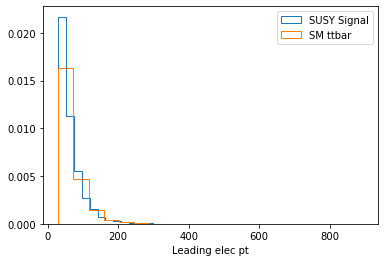

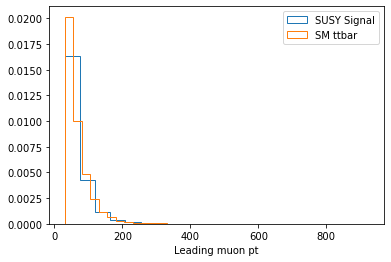

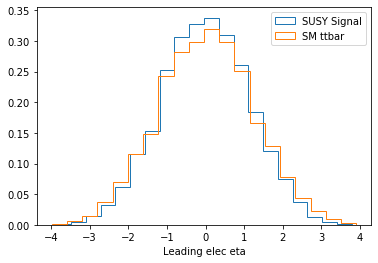

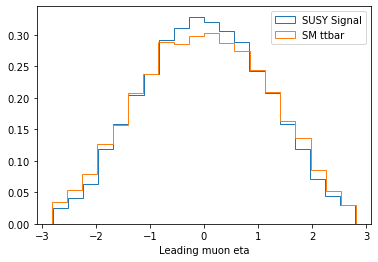

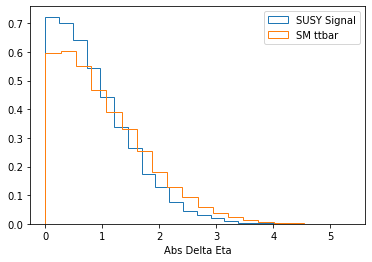

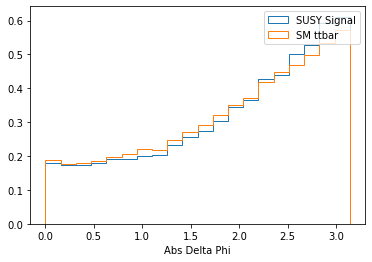

In [10]:
HLFs = ['Leading elec pt', 'Leading muon pt', 'Leading elec eta', 'Leading muon eta','Abs Delta Eta', 'Abs Delta Phi']
for hlf in HLFs:
    plt.figure()
    plt.hist(sig_df[hlf], bins=20, normed=True, histtype='step', label='SUSY Signal')
    plt.hist(bkg_df[hlf], bins=20, normed=True, histtype='step', label='SM ttbar')
    plt.xlabel(hlf)
    plt.legend(loc='best')

In [12]:
# Set both to equal sizes 
# Reducing the bkg dataframe size

bkg_df = bkg_df[1:len(sig_df)]

# Standardize
# It was originally just subtracting bkg mean from both,
# not sure how much sense that makes
sig_mean = sig_df.mean()
sig_std  = sig_df.std()

bkg_mean = bkg_df.mean()
bkg_std  = bkg_df.std()

sig_df = (sig_df - bkg_mean)/ sig_std
bkg_df = (bkg_df - bkg_mean)/ bkg_std

signal = sig_df.values
bkg    = bkg_df.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))

In [13]:
data.shape

(37011, 6)

In [15]:
len(label[label == 1])

18506

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x1b6bd3fa20>

In [17]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]


TRAIN: [    1     2     3 ... 37000 37001 37004] TEST: [    0     4     6 ... 37008 37009 37010]
TRAIN: [    0     4     6 ... 37008 37009 37010] TEST: [    1     2     3 ... 37000 37001 37004]


In [18]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
opt = SGD(lr=0.5, decay=1e-6, momentum=0.05, nesterov=True)
model.add(Dense(10, input_dim = 6 ,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amandee

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [23]:
hist = model.fit(x_train, y_train, batch_size=150, nb_epoch=50,verbose=1, shuffle=True, validation_split=0.3,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Train on 12954 samples, validate on 5552 samples
Epoch 1/50
12954/12954 [==============================] - 0s 13us/step - loss: 0.5838 - acc: 0.7142 - val_loss: 1.2140 - val_acc: 0.0000e+00
Epoch 2/50
  150/12954 [..............................] - ETA: 0s - loss: 0.5548 - acc: 0.7333

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


12954/12954 [==============================] - 0s 10us/step - loss: 0.5826 - acc: 0.7143 - val_loss: 1.1389 - val_acc: 0.0000e+00
Epoch 3/50
12954/12954 [==============================] - 0s 8us/step - loss: 0.5823 - acc: 0.7144 - val_loss: 1.2404 - val_acc: 0.0000e+00
Epoch 4/50
12954/12954 [==============================] - 0s 9us/step - loss: 0.5826 - acc: 0.7142 - val_loss: 1.2440 - val_acc: 0.0000e+00
Epoch 5/50
12954/12954 [==============================] - 0s 8us/step - loss: 0.5816 - acc: 0.7143 - val_loss: 1.1283 - val_acc: 3.6023e-04
Epoch 6/50
12954/12954 [==============================] - 0s 8us/step - loss: 0.5813 - acc: 0.7143 - val_loss: 1.1758 - val_acc: 0.0000e+00
Epoch 7/50
12954/12954 [==============================] - 0s 9us/step - loss: 0.5815 - acc: 0.7144 - val_loss: 1.1284 - val_acc: 0.0018
Epoch 8/50
12954/12954 [==============================] - 0s 9us/step - loss: 0.5802 - acc: 0.7141 - val_loss: 1.1441 - val_acc: 0.0000e+00
Epoch 9/50
12954/12954 [==========

In [21]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')

    plt.show()

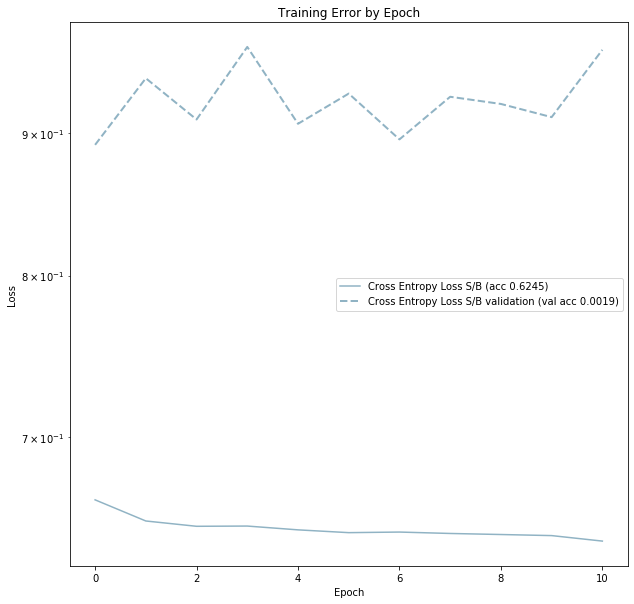

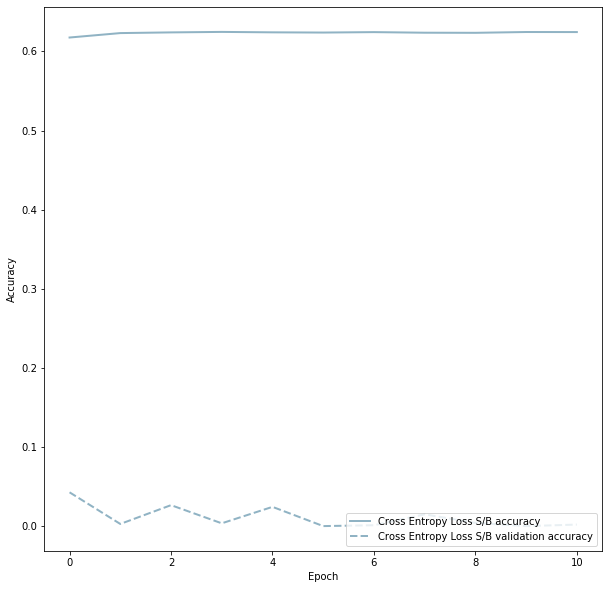

In [22]:
show_losses( [("Cross Entropy Loss S/B", hist)])

In [21]:
def accuracy( p ):
    p_cat = np.argmax(p,axis=1)
    print("Fraction of good prediction")
    print(len(np.where( p_cat == y_test)[0]))
    print(len(np.where( p_cat == y_test )[0])/float(len(p_cat)),"%")

In [22]:
pred = model.predict(x_test) 
pred

array([[0.5645953 ],
       [0.48495457],
       [0.9995942 ],
       ...,
       [0.342888  ],
       [0.4805662 ],
       [0.61143416]], dtype=float32)

In [23]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [24]:
from sklearn.metrics import roc_curve
y_pred = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [25]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

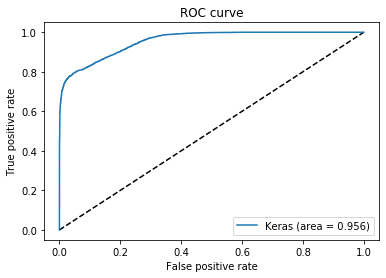

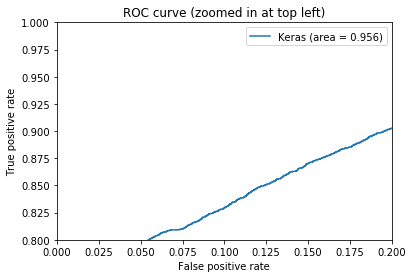

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


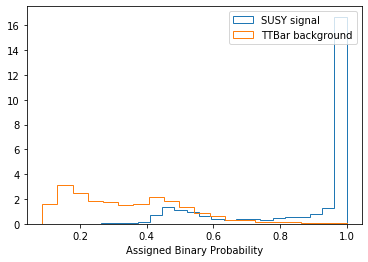

In [27]:
plt.figure()
plt.hist(pred[y_test == 1], bins=20, normed=True, histtype='step', label='SUSY signal')
plt.hist(pred[y_test == 0], bins=20, normed=True, histtype='step', label='TTBar background')
plt.xlabel('Assigned Binary Probability')
plt.legend(loc='best')

In [28]:
bool_arr = pred[y_test == 1] > 0.8
np.sum(bool_arr)

5225

In [29]:
bool_arr = pred[y_test == 0] > 0.8
np.sum(bool_arr)

109

In [31]:
len(pred[y_test == 1])

7078

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model_2016_pkl.json", "w") as json_file:
    json_file.write(model_json)

    # serialize weights to HDF5
model.save_weights("model_2016_pkl.h5")
print("Saved model to disk")